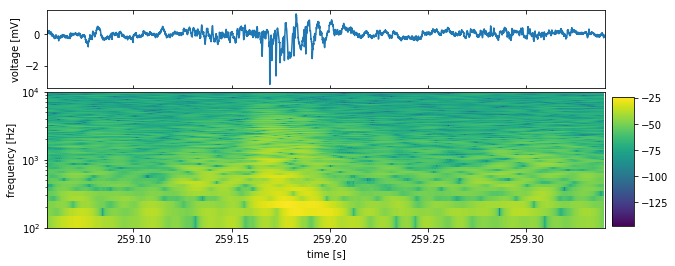

In [4]:
import pickle
import numpy as np
import pandas as pd
import wave
#import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)
    
####base---------------------------------------------------------------------------------------------
starttime = 259.056
endtime = 259.34
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)


#fig, (ax1, ax2) = plt.subplots(nrows=2)

plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
#fig, (ax1, ax2) = plt.subplots(nrows=2)
plt.subplot(4, 1, 1)

#fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharey=True)
#plt.figure(figsize=(6,2))
ylabel("voltage [mV]")
plt.xlim(starttime,endtime)
plt.xticks(color="None")#, length = -10)
#plt.axes.set_aspect('equal')
#plt.axis()
#plt.xscale(length=-10)
plt.tick_params('x',direction='in' ,  top=True)
#plt.grid(False)
#plt.tick_params(which='major',width = 0.5, length = 0)
#plt.tick_params(which='minor',width = 0.5, length = 5)

plt.plot(datatime,df[start:end])
del datatime

#data = df.dataframe([0], dtype='float')
#data = (pd.Series(df[start:end], dtype=np.float64))
#data = df.as_matrix(0,)#[start:end]
specdatab = np.array(df[start:end])
del df
specdataa = specdatab.flatten()
del specdatab
fp.close
#print(specdataa)
N = 512
hammingWindow = np.hamming(N)
samplingrate = 25000
length = (end - start)/samplingrate

# FFTで用いるハミング窓
hammingWindow = np.hamming(N)


# スペクトログラムを描画
plt.subplot(2, 1, 2)
#plt.figure(figsize=(9,4))


pxx, freqs, bins, im = plt.specgram(specdataa, NFFT=N, Fs=samplingrate, noverlap=N-1, window=hammingWindow,  xextent=(starttime,endtime))
axis([starttime, starttime + length, 0, samplingrate / 2])
plt.yscale("log")
xlabel("time [s]")
plt.yticks([100,1000,10000])
plt.ylim(100,10000)
ylabel("frequency [Hz]")

#plt.colorbar(orientation='horizontal')
#cax = plt.add_axes([0.2, 0.05, 0.6, 0.015])
#plt.colorbar(pp, cax=axColor, orientation="vertical")
axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
plt.colorbar(im, cax=axColor, orientation="vertical")
#plt.tight_layout()
plt.show()
#plt.savefig('B39100-10000_spec-ripple.png',dpi=300)

del specdataa, pxx, freqs, bins, im

AttributeError: module 'scipy.signal' has no attribute 'ricker'

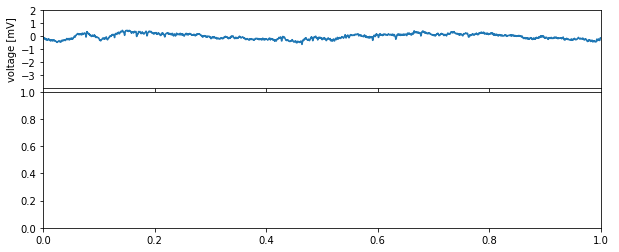

In [2]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import scipy
from scipy import signal
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home//nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)

starttime = 1700
endtime = 1700.1
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
plt.xticks(color="None")
plt.plot(datatime,df[start:end])
del datatime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()
fp.close
#widths = np.arange(1, 31)
P = 1024
widths = np.arange(1, P)

plt.subplot(2, 1, 2)
cwtmatr = scipy.signal.cwt(specdataa, signal.ricker, widths)
xlabel("time [second]")
ylabel("frequency [Hz]")
plt.yticks([1,10,100,1000])
plt.ylim(1,1000)
plt.yscale("log")
im=plt.imshow(cwtmatr, extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
xlim(starttime, endtime)
axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
plt.colorbar(im, cax=axColor, orientation="vertical")
#ylim(0, 4096)
#plt.colorbar(orientation='horizontal')
plt.show()

#p.show()
del df, widths, specdataa, cwtmatr, signal.ricker, im, axColor

In [1]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import scipy
import pywt
from scipy import signal
from pylab import *
#with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
with open('/home//nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)

starttime = 1700
endtime = 1701
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
plt.xticks(color="None")
plt.plot(datatime,df[start:end])
del datatime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()
fp.close
#widths = np.arange(1, 31)
P = 1024
widths = np.arange(1, P)

def daub(S):
    total = ((1+sqrt(3))/8)*daub(2*S) + ((3+sqrt(3))/8)*daub(2*S-1) + ((3-sqrt(3))/8)*daub(2*S-2) + ((1-sqrt(3))/8)*daub(2*S-3)
    return total

#w = pywt.Wavelet('db4')
#plt.show(daub())

plt.subplot(2, 1, 2)
cwtmatr = scipy.signal.cwt(specdataa, daub, widths)
xlabel("time [second]")
ylabel("frequency [Hz]")
plt.yticks([1,10,100,1000])
plt.ylim(1,1000)
plt.yscale("log")
im=plt.imshow(cwtmatr, extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
xlim(starttime, endtime)
axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
plt.colorbar(im, cax=axColor, orientation="vertical")
#ylim(0, 4096)
#plt.colorbar(orientation='horizontal')
plt.show()

#p.show()
del df, widths, specdataa, cwtmatr, signal.ricker, im, axColor

TypeError: daub() takes 1 positional argument but 2 were given